In [1]:
import os
import re
import pandas as pd

# Path to the specific CSV file
file_path = './comments/OneRepublic - Counting Stars.csv'

# Compile the emoji detection pattern
emoji_pattern = re.compile(
    "[\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "\U00002702-\U000027B0"  # Miscellaneous Symbols
    "\U000024C2-\U0001F251"  # Enclosed characters
    "]+", flags=re.UNICODE
)

# Process the specific file
try:
    # Use on_bad_lines='skip' to skip malformed rows
    df = pd.read_csv(file_path, on_bad_lines='skip', encoding='utf-8', engine='python')
    df['video'] = os.path.basename(file_path)  # Add a column to identify the source file
    df['contains_emoji'] = df['comment'].str.contains(emoji_pattern, na=False)  # Identify rows with emojis
    print(f"Total records in the file: {df.shape[0]}")
    print(f"Records with emojis: {df['contains_emoji'].sum()}")
    
    # Display the first few rows for verification
    print(df.head())
except Exception as e:
    print(f"Error processing file {file_path}: {e}")


Total records in the file: 50000
Records with emojis: 13274
                    user_id         username  \
0  UCzUCtH4Awdy3IiTN3JSj3Zg      @nat0106951   
1  UCbedrIIz_HaqhXzJHKQycZA  @Teo-playz-2015   
2  UCZx0joUEqdp_bt8xNn-4mAQ         @AmChase   
3  UCzuJF6gqb2f1DWjb7ZPFcag    @FreddioSmith   
4  UCAzBbON2TrwLIa1XUyL04pw        @Zepkhiel   

                                             comment  likes  replies  \
0  My Grind song for the past 10 years. Here 2am ...      0        0   
1  I love this song so much that I play it everyday😊      1        1   
2        I remember when this song was 5 years old 😅      0        0   
3                               WHAT 4 BILLION VIEWS      0        0   
4                                                 xd      0        0   

                   date                             video  contains_emoji  
0  2024-10-20T17:59:00Z  OneRepublic - Counting Stars.csv           False  
1  2024-10-20T17:50:23Z  OneRepublic - Counting Stars.csv         

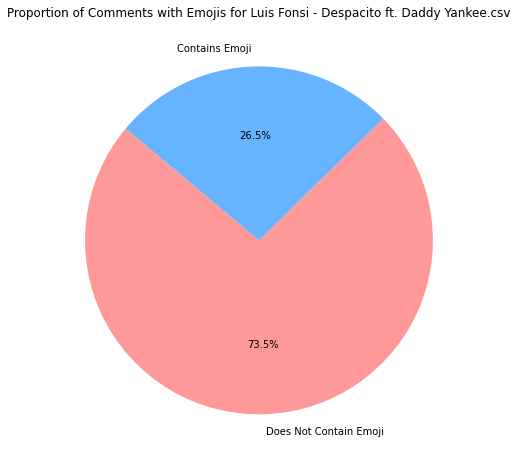

In [2]:
import matplotlib.pyplot as plt
# Count rows with and without emojis
emoji_counts = df['contains_emoji'].value_counts()
labels = ['Does Not Contain Emoji','Contains Emoji']

# Plotting a pie chart
plt.figure(figsize=(8, 8))
plt.pie(emoji_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Proportion of Comments with Emojis for Luis Fonsi - Despacito ft. Daddy Yankee.csv')
plt.show()

In [3]:
def count_emojis(text):
    return len(emoji_pattern.findall(text))
data_emoji = df[df['contains_emoji'] == True]
data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)
data_filtered = data_emoji[(data_emoji['emoji_count'] <= 4) & (data_emoji['comment'].str.len() <= 100)]
data_filtered

<ipython-input-3-9dc44fd67257>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_emoji['emoji_count'] = data_emoji['comment'].apply(count_emojis)


,user_id,username,comment,likes,replies,date,video,contains_emoji,emoji_count
1,UCbedrIIz_HaqhXzJHKQycZA,@Teo-playz-2015,I love this song so much that I play it everyday😊,1,1,2024-10-20T17:50:23Z,OneRepublic - Counting Stars.csv,True,1
2,UCZx0joUEqdp_bt8xNn-4mAQ,@AmChase,I remember when this song was 5 years old 😅,0,0,2024-10-20T17:47:49Z,OneRepublic - Counting Stars.csv,True,1
8,UCpvcL0V1ejuOl8hUogJSzkg,@Adrien14068,2024 nghe vẫn hay 🔥❤️‍🔥,0,0,2024-10-20T13:41:18Z,OneRepublic - Counting Stars.csv,True,2
9,UCY_6l5Yg9rI3pVTPMDH1waA,@karolmusia6804,🎉,0,0,2024-10-20T13:38:03Z,OneRepublic - Counting Stars.csv,True,1
10,UCQP_JbOPlOCji1hRoEj_lcQ,@CharlieTheSCRGamer25,The best song ever!\nThose who agree?\n👇,5,0,2024-10-20T13:20:27Z,OneRepublic - Counting Stars.csv,True,1
...,...,...,...,...,...,...,...,...,...
49977,UCUOF0bEvswZK7bF_9in4kwQ,@pielme8167,😴♥️,0,0,2021-10-28T10:18:53Z,OneRepublic - Counting Stars.csv,True,1
49979,UC9dI8f_Wt5gTgVVK_oWxMrQ,@arthurvenkip5154,It has an Aviciii vibe 🥴🔥🔥,1,0,2021-10-28T09:58:43Z,OneRepublic - Counting Stars.csv,True,1
49985,UCMDoTZ3BtK4WtTkE-dTVIZg,@stefanigallage8139,Who else just randomly remembered this song 😊,0,0,2021-10-28T07:44:03Z,OneRepublic - Counting Stars.csv,True,1
49986,UCjmH_7NJ6NZtz4Qz0UocBvQ,@stylesbot9528,What! 2013 was 8 years ago?!!! 😢♥️,1,0,2021-10-28T06:40:44Z,OneRepublic - Counting Stars.csv,True,1


In [ ]:
import os
from deep_translator import GoogleTranslator
from langdetect import detect
import pandas as pd
import re
def extract_emojis(text):
    """Extract all emojis from a given text."""
    return ''.join(emoji_pattern.findall(text))

# Define the function to translate text
def translate_to_english(row):
    try:
        text = row['comment']
        row_number = row.name + 1  # Get the row number (1-indexed)
        
        # Extract emojis
        emojis = extract_emojis(text)
        
        # Remove emojis before translation
        text_without_emojis = emoji_pattern.sub('', text).strip()
        
        # Handle emoji-only text or empty text
        if not text_without_emojis:
            print(f"Row {row_number}: Text contains only emojis or is empty: {text}")
            return text  # Return original text if no translatable content
        
        # Detect language
        detected_language = detect(text_without_emojis)
        print(f"Row {row_number}: Detected language: {detected_language}")

        # Translate if necessary
        if detected_language != 'en':
            translation = GoogleTranslator(target='en').translate(text_without_emojis)
        else:
            translation = text_without_emojis  # Keep the original if it's English

        # Append emojis to the translated text
        translated_with_emojis = f"{translation} {emojis}".strip()
        
        print(f"Row {row_number}: Original: {text}, Translated: {translated_with_emojis}")
        return translated_with_emojis
    except Exception as e:
        print(f"Row {row_number}: Error translating text: {text}, Error: {e}")
        return text
output_folder = './translated_comments_folder2'
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, 'OneRepublic - Counting Stars.csv')

# Process each row and save results
with open(output_file, 'a', encoding='utf-8') as f:
    # Write header if the file is empty
    if os.path.getsize(output_file) == 0:
        f.write("row_number,original_comment,translated_comment\n")
    
    # Apply the translation function row by row
    for _, row in data_emoji.iterrows():
        row_number = row.name + 1
        original_comment = row['comment']
        translated_comment = translate_to_english(row)
        
        # Append the row to the CSV
        f.write(f"{row_number},{original_comment},{translated_comment}\n")
        print(f"Row {row_number} saved.")

Row 2: Detected language: en
Row 2: Original: I love this song so much that I play it everyday😊, Translated: I love this song so much that I play it everyday 😊
Row 2 saved.
Row 3: Detected language: en
Row 3: Original: I remember when this song was 5 years old 😅, Translated: I remember when this song was 5 years old 😅
Row 3 saved.
Row 9: Detected language: vi
Row 9: Error translating text: 2024 nghe vẫn hay 🔥❤️‍🔥, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 9 saved.
Row 10: Text contains only emojis or is empty: 🎉
Row 10 saved.
Row 11: Detected language: en
Row 11: Original: The best song ever!
Those who agree?
👇, Translated: The best song ever!
Those who agree? 👇
Row 11 saved.
Row 12: Detected language: en
Row 12: Original: 11 years later and this song is still a legend❤, Translated: 11 year

Row 172: Error translating text: Here 2030😂, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 172 saved.
Row 176: Detected language: pt
Row 176: Error translating text: Muito triste, mais um jovem que se perde,😢😢😢, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 176 saved.
Row 177: Detected language: en
Row 177: Original: 4 billion Man I remember when I was the 1st view!!!! 🎉 ❤️, Translated: 4 billion Man I remember when I was the 1st view!!!! 🎉❤️
Row 177 saved.
Row 181: Detected language: en
Row 181: Original: Y'all Liam Payne isn't a member of One republic, he's from one direction. 😂 Y'all saying RIP in wr

Row 295: Error translating text: Aquí los que ven el video en 2024
👍, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 295 saved.
Row 296: Detected language: en
Row 296: Original: First song i have seen with over 4billion views😮, Translated: First song i have seen with over 4billion views 😮
Row 296 saved.
Row 299: Detected language: fr
Row 299: Error translating text: 2025 LEGENDS🎉, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 299 saved.
Row 305: Detected language: tl
Row 305: Error translating text: bikin mood naik nih lagu❤, Error: Server Error: You made too many requests to the server.According to goog

Row 437: Error translating text: Привет, 😂, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 437 saved.
Row 439: Detected language: en
Row 439: Original: I would listen to this when the world is ending 
⠀⠀⣠⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⢠⣤⡀⠀⠀
⠀⠀⣿⣿⡀⠀⠀⠀⠀⠀⠀⠀⠀⣸⣿⡇⠀⠀
⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⠀⠀⣿⣿⠁⠀⠀⠀⠀⠀⠀⠀⠀⢹⣿⡇⠀⠀
⠀⠀⠙⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠛⠁⠀⠀
⠀⠀⠀⠀⠀⠀⠀⣀⣤⣶⣶⣶⣤⣄⠀⠀⠀⠀
⠀⠀⠀⠀⢀⣴⣾⣿⣿⣿⣿⣿⣿⣿⣷⠀⠀⠀
⠀⠀⠀⣠⣾⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⠀⠀⣴⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡿⠁⠀⠀
⠀⢸⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⠁⠀⠀⠀
⠀⠀⢻⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣷⡀⠀⠀
⠀⠀⠀⠙⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⠀⠀⠀⠀⠈⠻⢿⣿⣿⣿⣿⣿⣿⣿⡿⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠙⠛⠿⠿⠿⠛⠋⠀⠀⠀
⠀⠀⣶⣶⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⣿⣿⣿⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠘⢿⣿⣿⣶⣶⣶⣶⣶⣶⡆⠀⠀
⠀⠀⠀⠀⠙⠻⠿⠿⠿⠿⠿⠿⠇⠀⠀
⠀⠀⣀⣀⣀⣀⣀⣀⣀⣀⣀⣀⡀⠀⠀
⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⠀⠀⣿⣿⣿⠉⣿⣿⡏⠉⣿⣿⡇⠀⠀
⠀⠀⣿⣿⣿⠀⣿⣿⡇⠀⣿⣿⡇⠀⠀
⠀⠀⢿⣿⡿⠀⠿⠿⠇⠀⣿⣿⡇⠀⠀
⠀⠀⣤⣤⣤⣤⣤⣤⣤⣤⣤⣤⡄⠀⠀
⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⠀⠀⠈⠛⢿⣿⣿⣿⣦⣄⠀⠀⠀⠀⠀
⠀⠀⣠⣤⣤⣬⣽⣿⣿⣿⣿⣦⡄⠀⠀
⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⠀⠀⠈⠉⠉⠉⠉⠉⠉⠉⠉⠉⠀⠀⠀
⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⠀⠀⠻⢿⣿⣿⣿⣿⡛⠛⠛⠛⠃⠀⠀
⠀⠀⠀⠀⠉⠻⢿⣿⣿⣷⣦⣀⠀⠀⠀
⠀⠀⣿⣿⣿⣿⣿⣿⣿⣿⣿⣿⡇⠀⠀
⠀⠀⠛⠛⠛⠛⠛⠛⠛⠛⠛⠛⠃⠀⠀
⠀⠀⣴⣶⣶⣶⣶⣶⣶⣶⣶⣶⡄⠀⠀
⠀⠀⣿⣿

Row 560: Error translating text: l Iove❤, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 560 saved.
Row 562: Text contains only emojis or is empty: 日本から聞いてます
Row 562 saved.
Row 566: Detected language: en
Row 566: Original: Baby will be counting stars 🌟 ❤😊, Translated: Baby will be counting stars 🌟❤😊
Row 566 saved.
Row 567: Text contains only emojis or is empty: 🔥
Row 567 saved.
Row 568: Detected language: en
Row 568: Original: Guys who still rember this legendary song and has come back 😊❤❤, Translated: Guys who still rember this legendary song and has come back 😊❤❤
Row 568 saved.
Row 569: Detected language: id
Row 569: Error translating text: ❤ like comment subscribe kar diya hai madam ji, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 

Row 696: Error translating text: Anyone 2024 ❤😩, Error: Server Error: You made too many requests to the server.According to google, you are allowed to make 5 requests per secondand up to 200k requests per day. You can wait and try again later oryou can try the translate_batch function
Row 696 saved.
Row 699: Detected language: en
Row 699: Original: Congratulations on four billion views🎉, Translated: Congratulations on four billion views 🎉
Row 699 saved.
Row 701: Detected language: en
Row 701: Original: I love this song very much ❤ you are the best person I like it so much you are so talented.❤, Translated: I love this song very much  you are the best person I like it so much you are so talented. ❤❤
Row 701 saved.
Row 703: Detected language: en
Row 703: Original: I really love the song and I want to be a content creator but my mom doesn’t like it 😢😢😢😢😢😢🎉🎉🎉🎉🎉, Translated: I really love the song and I want to be a content creator but my mom doesn’t like it 😢😢😢😢😢😢🎉🎉🎉🎉🎉
Row 703 saved.
Row 7